In [387]:
#Add some varibles to represent column names.

RK = 'Rk'
PLAYER = 'Player'
POS = 'Pos'
AGE = 'Age'
TM = 'Tm'
G = 'G'
GS = 'GS'
MP = 'MP'
FG = 'FG'
FGA = 'FGA'
FG_P = 'FG%'
THREE_P = '3P'
THREE_PA = '3PA'
THREE_P_P = '3P%'
TWO_P = '2P'
TWO_PA = '2PA'
TWO_P_P = '2P%'
EFG_P = 'eFG%'
FT = 'FT'
FTA = 'FTA'
FT_P = 'FT%'
ORB = 'ORB'
DRB = 'DRB'
TRB = 'TRB'
AST = 'AST'
STL = 'STL'
BLK = 'BLK'
TOV = 'TOV'
PF = 'PF'
PTS = 'PTS'
SEASON = 'Season'
PID = 'Player ID'
WINS = 'Wins'

#hard code wins 



WIN_DICT = {
    'TOR': 89,
    'MEM': 107,
    'MIA': 97,
    'BRK': 89,
    'NOP': 78,
    'UTA': 86,
    'MIL': 109,
    'CLE': 95,
    'IND': 60,
    'LAL': 76,
    'ORL': 56,
    'NYK': 84,
    'HOU': 42,
    'WAS': 70,
    'PHO': 109,
    'SAC': 78,
    'DET': 40,
    'CHO': 70,
    'CHI': 86,
    'ATL': 84,
    'DEN': 101,
    'PHI': 105,
    'SAS': 52,
    'LAC': 86,
    'OKC': 64,
    'MIN': 90,
    'DAL': 90,
    'GSW': 97,
    'POR': 60,
    'BOS': 108
}





In [403]:
# read files ad do some preliminary cleaning

import pandas as pd
import numpy as np

# Get data from season 22
reg_22 = pd.read_csv('21-22-reg.csv', encoding = 'mac_roman',delimiter=';')

# Get data from season 23
reg_23 = pd.read_csv('22-23-reg.csv', encoding = 'mac_roman',delimiter=';')

# print(reg_22.shape, reg_23.shape)

# Clean player column to be a unique ID byt lavelling with seasion & playoff/ reg

reg_22[PID] = reg_22[PLAYER].astype(str) + "_" + reg_22[TM].astype(str) + "_22"

reg_23[PID] = reg_23[PLAYER].astype(str) + "_" + reg_23[TM].astype(str) + "_23"



reg_22[SEASON] = "22"
# playoff_22['Season'] = "22_P"
reg_23[SEASON] = "23"
# playoff_23['Season'] = "23_P"
# reg_24['Season'] = "24_R"


#Combine to one data frame

combined_stats = pd.concat([reg_22, reg_23])

print(combined_stats.dtypes)

combined_stats[PLAYER] = combined_stats[PLAYER].astype('string')
combined_stats[POS] = combined_stats[POS].astype('string')
combined_stats[TM] = combined_stats[TM].astype('string')
combined_stats[PID] = combined_stats[PID].astype('string')
combined_stats[SEASON] = combined_stats[SEASON].astype('string')

combined_stats[WINS] = 0

print(combined_stats.dtypes)


Rk             int64
Player        object
Pos           object
Age            int64
Tm            object
G              int64
GS             int64
MP           float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
Player ID     object
Season        object
dtype: object
Rk                    int64
Player       string[python]
Pos          string[python]
Age                   int64
Tm           string[python]
G                     int64
GS                    int64
MP                  float64
FG                  float64
FGA                 float64
FG%                 float64
3P    

In [404]:

#Column  no longer required
combined_stats.drop(RK,axis=1, inplace=True)

#Remove total rows. These rows indicate players who were traded mid season and are not mapped to a team.
combined_stats = combined_stats[combined_stats[TM] != 'TOT']

#Reset index
combined_stats.reset_index(inplace=True)


print(combined_stats.dtypes)



combined_stats.to_csv('22_23_PlayerStats',index=False, encoding='mac_roman',sep=';')


index                 int64
Player       string[python]
Pos          string[python]
Age                   int64
Tm           string[python]
G                     int64
GS                    int64
MP                  float64
FG                  float64
FGA                 float64
FG%                 float64
3P                  float64
3PA                 float64
3P%                 float64
2P                  float64
2PA                 float64
2P%                 float64
eFG%                float64
FT                  float64
FTA                 float64
FT%                 float64
ORB                 float64
DRB                 float64
TRB                 float64
AST                 float64
STL                 float64
BLK                 float64
TOV                 float64
PF                  float64
PTS                 float64
Player ID    string[python]
Season       string[python]
Wins                  int64
dtype: object


In [405]:
print(combined_stats.columns)

#Column  no longer required
combined_stats.drop(RK,axis=1, inplace=True)


#Remove total rows. These rows indicate players who were traded mid season and are not mapped to a team.
combined_stats = combined_stats[combined_stats[TM] != 'TOT']

#Reset index
combined_stats.reset_index(inplace=True)


print(combined_stats.dtypes)




Index(['index', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player ID', 'Season', 'Wins'],
      dtype='object')


KeyError: "['Rk'] not found in axis"

In [422]:
# Add the wins columns.

combined_stats[WINS] = combined_stats[TM].map(WIN_DICT)

print(combined_stats.tail(20))


      index              Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
1304    658    Kenrich Williams  PF   28  OKC  53  10  22.8  3.4   6.5  ...   
1305    659       Mark Williams   C   21  CHO  43  17  19.3  3.7   5.8  ...   
1306    660    Patrick Williams  PF   21  CHI  82  65  28.3  3.8   8.3  ...   
1307    661     Robert Williams   C   25  BOS  35  20  23.5  3.6   4.9  ...   
1308    662  Vince Williams Jr.  SG   22  MEM  15   1   7.0  0.8   2.7  ...   
1309    663     Ziaire Williams  SF   21  MEM  37   4  15.2  2.3   5.3  ...   
1310    664     Zion Williamson  PF   22  NOP  29  29  33.0  9.8  16.2  ...   
1311    665       Dylan Windler  SF   26  CLE   3   0   3.3  0.7   1.0  ...   
1312    666     Justise Winslow  SF   26  POR  29  11  26.8  2.8   6.8  ...   
1313    668       James Wiseman   C   21  GSW  21   0  12.5  2.8   4.5  ...   
1314    669       James Wiseman   C   21  DET  24  22  25.2  5.4  10.2  ...   
1315    670      Christian Wood   C   27  DAL  67  1

In [424]:
combined_stats.to_csv('22_23_PlayerStats',index=False, encoding='mac_roman',sep=';')

Validate data

In [425]:
def validate_not_null(df):
    if df.isnull().sum().sum() > 0:
        print("Dataframe contains missing values")
        print(df.isnull().sum())
  

def validate_duplicate(df):
    if df.duplicated().sum() > 0:
        print("DataFrame contains duplicate rows")
 

def validate_range(df):
    for i in df.select_dtypes(include=[np.number]).columns:
        if (df[i] < 0).any() and (df[i] > 80).any() :
            print("Data frame containes negative value or large outlier")
   

def validate_unique(df, col):
    duplicates = df[col].duplicated()
    for i in range(0,len(duplicates)):
        if duplicates[i]:
            print(df[col][i], df[TM][i])



def validate(df):
    validate_not_null(df)
    validate_duplicate(df)
    validate_range(df)
    validate_unique(df, PID) # PLayer should be unique for each list.




validate(combined_stats)

print(combined_stats[TM].unique())
print(combined_stats[POS].unique())


<StringArray>
['TOR', 'MEM', 'MIA', 'BRK', 'NOP', 'UTA', 'MIL', 'CLE', 'IND', 'LAL', 'ORL',
 'NYK', 'HOU', 'WAS', 'PHO', 'SAC', 'DET', 'CHO', 'CHI', 'ATL', 'DEN', 'PHI',
 'SAS', 'LAC', 'OKC', 'MIN', 'DAL', 'GSW', 'POR', 'BOS']
Length: 30, dtype: string
<StringArray>
['C', 'PF', 'SG', 'PG', 'SF']
Length: 5, dtype: string


In [486]:
print(combined_stats.shape)


(1324, 33)


R: 0.024299161558491815 P: 0.6145005710022883 std error 0.10088146082410615


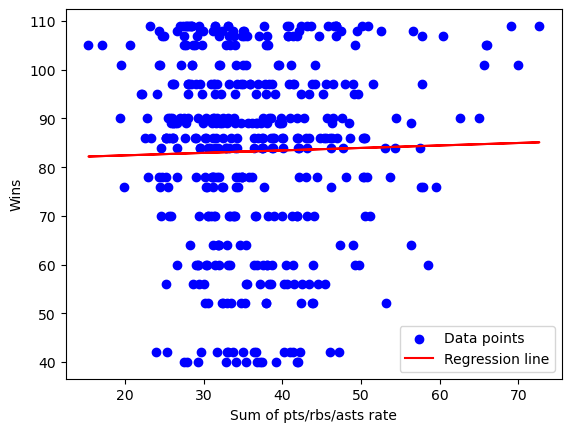

In [615]:
#Analysis linear reagression using average pts / assits / rebounds acocunting for rate

import scipy.stats as stats
import matplotlib.pyplot as plt


cs = combined_stats

cs = cs[(cs[G] >= 55) & (cs[MP] > 15)]

x = (cs[PTS] + cs[TRB] + cs[AST]) * 48 / cs[MP] 
y = cs[WINS]


slope, intercept, r, p, std_err = stats.linregress(x,y)

print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))

regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Sum of pts/rbs/asts rate')
plt.ylabel('Wins')
plt.legend()
plt.show()


R: -0.028741714389336252 P: 0.2960010546714444 std error 0.08152025614133704


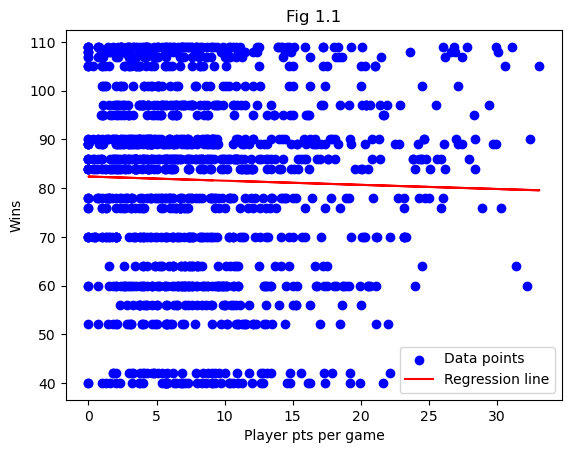

In [627]:
# Pts to wins



x = (cs[PTS])
y = cs[WINS]


slope, intercept, r, p, std_err = stats.linregress(x,y)

print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))

regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Player pts per game')
plt.ylabel('Wins')
plt.title('Fig 1.1')
plt.legend()
plt.show()


R: 0.013290939664628102 P: 0.6289683152758639 std error 0.05129865859154737


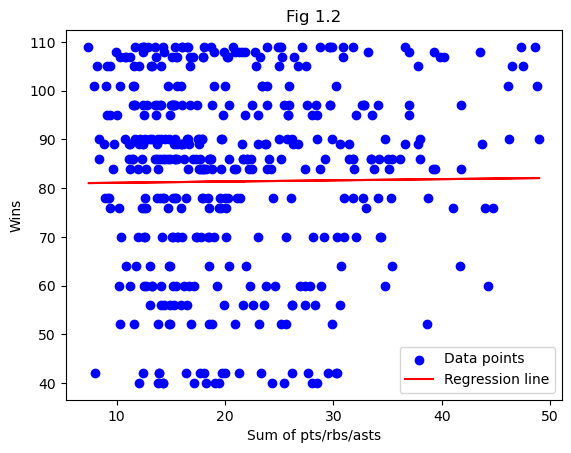

In [634]:
#Analysis only pts assists rebounds

cs = combined_stats

cs = cs[(cs[G] >= 55) & (cs[MP] > 15)] 

x = (cs[PTS] + cs[TRB] + cs[AST])
y = cs[WINS]


print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))


regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Sum of pts/rbs/asts')
plt.ylabel('Wins')
plt.title('Fig 1.2')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R: -0.025297594784712808 P: 0.8944354201036058 std error 2.25011207765141


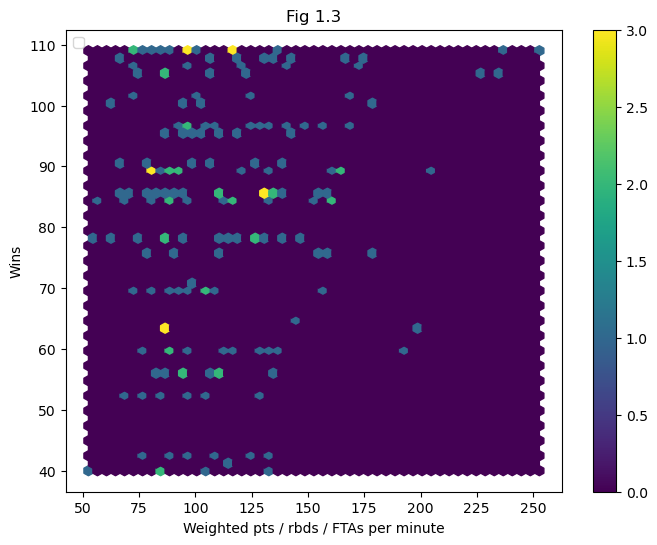

In [671]:
#Analysis ousing pts ./ rat and total rebounds acouining for minutes played
cs = combined_stats

cs = cs[(cs[G] >= 55) & (cs[MP] > 10) & (cs[FGA] > 10)] 
FT_weight = 7

Sht_weight = 4

x = (cs[PTS] * cs[EFG_P] * Sht_weight + cs[TRB] + FT_weight * cs[FTA]) * 48 /cs[MP]
y = cs[WINS]


print("R: "+ str(r),"P: " + str( p),"std error " + str(std_err))


regression = slope * x + intercept

# plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.figure(figsize=(8,6))
hb = plt.hexbin(x, y, gridsize=50) 
plt.colorbar(hb)
plt.xlabel('Weighted pts / rbds / FTAs per minute')
plt.ylabel('Wins')
plt.title('Fig 1.3')
plt.legend()
plt.show()


#Analysis
Teams = {
    'TOR': 0,
    'MEM': 107,
    'MIA': 97,
    'BRK': 89,
    'NOP': 78,
    'UTA': 86,
    'MIL': 109,
    'CLE': 95,
    'IND': 60,
    'LAL': 76,
    'ORL': 56,
    'NYK': 84,
    'HOU': 42,
    'WAS': 70,
    'PHO': 109,
    'SAC': 78,
    'DET': 40,
    'CHO': 70,
    'CHI': 86,
    'ATL': 84,
    'DEN': 101,
    'PHI': 105,
    'SAS': 52,
    'LAC': 86,
    'OKC': 64,
    'MIN': 90,
    'DAL': 90,
    'GSW': 97,
    'POR': 60,
    'BOS': 0
}

cs = cs[(cs[G] >= 50) & (cs[MP] > 20)]

cs['SUM'] = (cs[PTS] + cs[TRB]) * 48 / cs[MP]

x = cs.groupby(TM)[['SUM']].mean().reset_index()


x = np.array(x['SUM'])

y = np.array([*WIN_DICT.values()])


print(y)

slope, intercept, r, p, std_err = stats.linregress(x,y)

print(r, p, std_err)

regression = slope * x + intercept

# plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.figure(figsize=(8,6))
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('X')
plt.ylabel('Wins')
plt.legend()
plt.show()


[ 89 107  97  89  78  86 109  95  60  76  56  84  42  70 109  78  40  70
  86  84 101 105  52  86  64  90  90  97  60 108]
0.053646377014980005 0.7782881534717131 0.49853935110226383


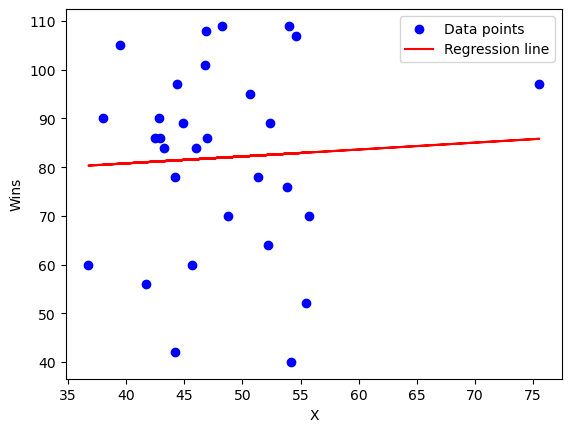

In [672]:
#Analysis
Teams = {
    'TOR': 0,
    'MEM': 107,
    'MIA': 97,
    'BRK': 89,
    'NOP': 78,
    'UTA': 86,
    'MIL': 109,
    'CLE': 95,
    'IND': 60,
    'LAL': 76,
    'ORL': 56,
    'NYK': 84,
    'HOU': 42,
    'WAS': 70,
    'PHO': 109,
    'SAC': 78,
    'DET': 40,
    'CHO': 70,
    'CHI': 86,
    'ATL': 84,
    'DEN': 101,
    'PHI': 105,
    'SAS': 52,
    'LAC': 86,
    'OKC': 64,
    'MIN': 90,
    'DAL': 90,
    'GSW': 97,
    'POR': 60,
    'BOS': 0
}

cs = cs[(cs[G] >= 20) & (cs[MP] > 15)]

cs['SUM'] = (cs[PTS]*cs[EFG_P] * 4 + cs[TRB])
x = cs.groupby(TM)[['SUM']].mean().reset_index()


x = np.array(x['SUM'])

y = np.array([*WIN_DICT.values()])


print(y)

slope, intercept, r, p, std_err = stats.linregress(x,y)

print(r, p, std_err)

regression = slope * x + intercept

plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('X')
plt.ylabel('Wins')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.013290939664628102 0.6289683152758639 0.05129865859154737


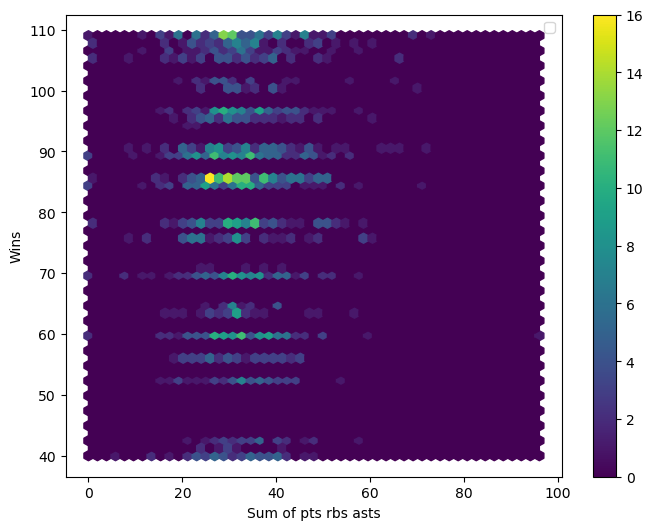

In [631]:
#Analysis

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


cs = combined_stats

# cs = cs[(cs[G] >= 55) & (cs[MP] > 15)] # Filter for Only players who played over a certain amount of games and minutes played per game

x = (cs[PTS] + cs[TRB] + cs[AST]) * 48 / cs[MP] 

y = cs[WINS]


slope, intercept, r, p, std_err = stats.linregress(x,y)

print(r, p, std_err)

regression = slope * x + intercept

plt.figure(figsize=(8,6))  
hb = plt.hexbin(x,y,gridsize=50)
plt.colorbar(hb)
# plt.plot(x, regression, color='red', label='Regression line') 
plt.xlabel('Sum of pts rbs asts')
plt.ylabel('Wins')
plt.legend()
plt.show()


In [ ]:

p